In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import time
import requests as req
import re
from bs4 import BeautifulSoup as bs
import seaborn as sns
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)
plt.rcParams['font.sans-serif'] = ['SimHei']  

In [2]:
# Read the file, the data was collected on 2021-10-20 (Might be different from the website now)
df = pd.read_csv('Yihan_Zhang_1823149.csv',encoding='utf-8')

In [3]:
# Split the release time to year and month and day
df['year']=pd.to_numeric(df['ReleaseTime'].apply(lambda  x:x[:4]))
df['monthAndDay']=df['ReleaseTime'].apply(lambda  x:x[5:])
df.Rating=pd.to_numeric(df['Rating'])

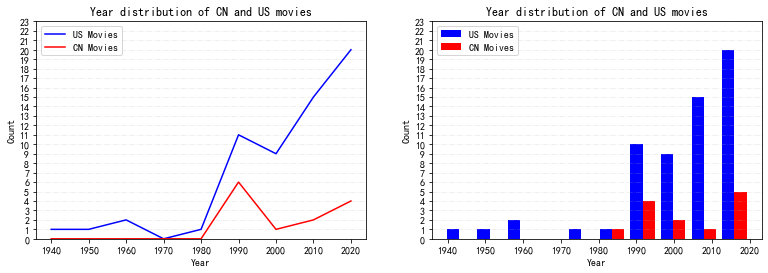

In [4]:
american_movies=df[df['Countries'].str.contains('美国')]
chinese_movies=df[df['Countries'].str.contains('中国')]
years=[1940,1950,1960,1970,1980,1990,2000,2010,2020]
us_counts=[1,1,2,0,1,11,9,15,20]
cn_counts=[0,0,0,0,0,6,1,2,4]
plt.figure(figsize=(13,4))
#Line Graph
plt.subplot(1,2,1)
plt.title('Year distribution of CN and US movies')
plt.plot(years,us_counts,label='US Movies',color='blue') 
plt.plot(years,cn_counts,label='CN Movies',color='red')
plt.ylim(0,20)
plt.yticks(range(0,24,1))
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True,axis='y',linestyle='-.',alpha=0.25)
plt.legend()
#Bar Chart
plt.subplot(1,2,2)
plt.title('Year distribution of CN and US movies')
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0,20)
plt.yticks(range(0,24,1))
plt.hist([american_movies.year,chinese_movies.year], label=['US Movies','CN Moives'],color=['blue','red'])
plt.grid(True,axis='y',linestyle='-.',alpha=0.25)
plt.legend()
plt.savefig('YearDistribution.png',bbox_inches = 'tight')
plt.show()

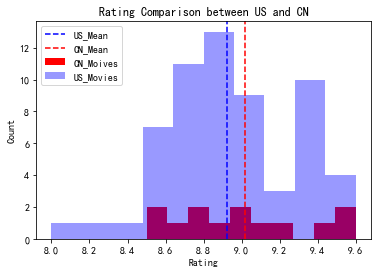

In [5]:
plt.title('Rating Comparison between US and CN')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.hist(chinese_movies.Rating, alpha=1, label='CN_Moives',color='red')
plt.hist(american_movies.Rating,  alpha=0.4, label='US_Movies',color='blue')
plt.axvline(american_movies.Rating.mean(),color='blue',linestyle='--',label='US_Mean')
plt.axvline(chinese_movies.Rating.mean(),color='red',linestyle='--',label='CN_Mean')
plt.legend()
plt.savefig('Rating.png',bbox_inches = 'tight')
plt.show()

In [6]:
temp_dict={}

for i,row_data in df.iterrows():
    countires=row_data['Countries'].split(',')
    for country in countires:
        if country=='中国大陆' or country=='中国香港' or country=='中国台湾':
            if '中国' in temp_dict.keys():
                temp_dict['中国']+=1  
            else:
                temp_dict['中国']=1
        else:
            if country in temp_dict.keys():
                temp_dict[country]+=1  
            else:
                temp_dict[country]=1

country_data=pd.DataFrame.from_dict(temp_dict, orient='index',columns=['number'])

country_data.sort_values(by=['number'],ascending=False,inplace=True)
country_data=country_data.reset_index().rename(columns = {'index':'country'})
country_data
country_data_clear=country_data.drop(country_data[country_data['number']<=2].index)
country_data_clear

,country,number
0,美国,60
1,中国,16
2,英国,15
3,日本,10
4,法国,8
5,德国,8
6,意大利,7
7,韩国,5
8,加拿大,4
9,瑞士,3


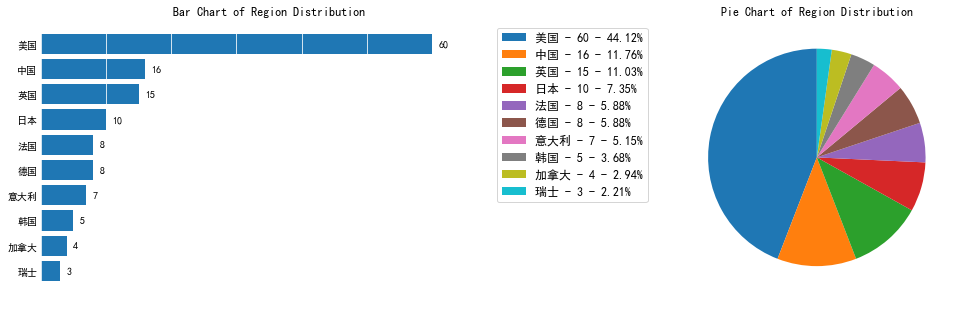

In [7]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
ax = plt.gca()
makes = country_data_clear.country.iloc[::-1]
numbers=country_data_clear.number.iloc[::-1]
nums=np.arange(len(country_data_clear))
plt.barh(makes,numbers)
plt.title('Bar Chart of Region Distribution')
for p, c, ch in zip(nums,makes,numbers):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

plt.subplot(1,2,2)
country_list=country_data_clear.loc[:,'country'].tolist()
number_list=country_data_clear.loc[:,'number'].tolist()
x=np.char.array(country_list)
y=np.array(number_list)
percent=100.*y/y.sum()
plt.title("Pie Chart of Region Distribution")
patches, texts =plt.pie(y,startangle=90)
labels = ['{0} - {1:d} - {2:1.2f}%'.format(i,j,k) for i,j ,k in zip(x,y,percent)]
patches,labels,dummy=zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.savefig("distribution.png",bbox_inches='tight') 
plt.show()